# 競馬データ取得プログラム(Python)

# 1.クローリングとスクレイピングについて


## 1.1 クローリングとスクレイピングの定義

### クローリング 
- Webページのハイパーリンクをたどって次々にWebページをダウンロードする作業。
### スクレイピング 
- ダウンロードしたWebページから必要な情報を抜き出す作業。

## 1.2クローリング・スクレイピングの方法
### プログラミング言語  
- python,PHP,java,C,Ruby
- シェルスクリプト(Unixコマンド)

### Webスクレイピングツール  
- ExcelやSpreadSheet  
- Octoparse   
- Scraper  

## 1.3クローリング・スクレイピングでPythonを使うメリット
- ### 言語自体の特性
読みやすく書きやすいPHP、Java、C / C ++と比べ、Pythonは最も簡単  
Pythonはプログラムを書いたらすぐに実行することができる対話型

- ### 強力なライブラリの存在
世界中の開発者が数多くのライブラリを公開しており、簡単に使うことができる  
lxmlやBeautifulSoupは有名なスクレイピングライブラリがある。
　
- ### スクレイピング後の処理との親和性
データ分析においてもPythonには優秀なライブラリのpandasなどが揃っている  
Pythonでは数値計算や科学技術計算の分野で古くからNumPyやSciPyといったライブラリが有名　　

## 1.4今回紹介するライブラリ
- ### Beautiful Soup 
シンプルかつわかりやすいAPIでデータを抜き出せるのが特徴で、古くから人気のあるライブラリです。  
内部のパーサーを目的に応じて切り替えられます。

- ### Selenium   
ブラウザーを自動操作するためのライブラリです。  
Pythonの他にJavaやJavaScriptなど様々な言語に対応しています。  
ブラウザーベンダーがWebDriverAPIを実装するドライバーを用意しており、これを経由して操作します。



# 2Pythonの基礎知識

## 2.1インタラクティブシェルの使用
pythonコマンドを引数なしで実行すると、インタラクティブシェルが起動します。  
pythonのコードを対話的に実行できるので、ライブラリの使い方の確認などに便利です。

## 2.2スクリプトファイルの実行と構成
pythonのスクリプトは.pyという拡張子のファイルに保存します。  
pythonコマンドにpyファイルのpathを引数として渡すとスクリプトファイルを実行されます。

## 2.3Jupyter Notebook
ノートブックと呼ばれるファイルにプログラムや説明の文章、実行結果などをまとめて管理できるます。  
データ分析用のツールです。

In [10]:
# ソースコードを記述し、Shift+Enterで実行できます。
print(1+2)

3


このように、Jupyter Notebookでは、セルごとにソースコードを記述して、実行を行うことができます。  
実行結果はすぐ下に表示され、何度でも再実行できます。  
また、Jupyter Notebookでは、ノートブックにグラフを表示することもできます。

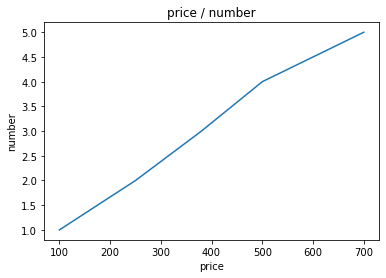

In [11]:
import matplotlib.pyplot as plt

price = [100, 250, 380, 500, 700]
number = [1, 2, 3, 4, 5]

# グラフを書く
plt.plot(price, number)

# グラフのタイトル
plt.title("price / number")

# x軸のラベル
plt.xlabel("price")

# y軸のラベル
plt.ylabel("number")

# 表示する
plt.show()

ソースコードと説明の文章、実行結果をまとめて保存しておくことができるので  
データ分析を試行錯誤しながら行うことがとても簡単に行うことができます。

## 2.4python基本文法

- ### データ構造 
Pythonでは数値、文字列、リスト、辞書などの基本的なデータ構造を手軽に扱えます。

#### 数値
整数と実数の基本的な四則演算が行えます。

In [13]:
a = 1
type(a) #整数はint型。type()関数でオブジェクトの型を確認

int

In [14]:
b = 3.14
type(b)#実数はfloat型。

float

In [17]:
print(1+1)

2


In [19]:
print(14/3)

4.666666666666667


In [21]:
print(14//3)

4


In [20]:
print(14%3)

2


#### 文字列
Unicode文字列を表すstr型とバイト列を表すbytes型があります。  
文字列操作は基本的にstr型で行い、ファイルやネットワーク越しのデータの読み書きなど  
Python以外との境界でbytes型に変換します。

In [25]:
type('abc')#文字列はstr型。<class'str'>  文字列は'または"で囲う。

str

In [26]:
print('abc\n123')#\nは改行文字

abc
123


#### リスト 

複数の値の列をひとまとめに扱うためのデータ型としてリスト(list)があります。  
リストは文字列と同じく順序を持ち反復可能な型（シーケンスと呼ばれる）であり  
同様の操作をサポートしています。他の言語では配列やArrayと呼ばれるデータ型に対応します。

In [28]:
l = []
type(l) #[]でリスト（list型）を得る。

list

In [55]:
l = [1, 2, 3] #値はカンマで区切る。
print(l)

[1, 2, 3]


In [56]:
l = [1, 2, 'Three',4.0] #任意のオブジェクトを要素として含められる。
print(l)

[1, 2, 'Three', 4.0]


In [57]:
print(l[0])#[n]でn番目の要素を取得する。
print(l[2])

1
Three


In [58]:
print(l[1:3])

[2, 'Three']


In [59]:
print(len(l)) # len()関数でリストの長さを取得する。

4


In [60]:
l = l + [5,6]#+演算子でリスト同士を結合したリストを得る。
print(l)

[1, 2, 'Three', 4.0, 5, 6]


In [61]:
l.append(7)#append()メソッドで値を末尾に追加する。
print(l)

[1, 2, 'Three', 4.0, 5, 6, 7]


In [62]:
l.insert(1,1.5)#insert()メソッドで第1引数のインデックスに第2引数の値を挿入する。
print(l)

[1, 1.5, 2, 'Three', 4.0, 5, 6, 7]


In [67]:
del l[1]#del文で指定したインデックスの要素を削除する。
print(l)

[1, 2, 'Three', 4.0, 5, 6, 7]


In [71]:
l.pop(0)#pop()で指定したインデックスの要素を取得し、リストから削除する。

'Three'

In [72]:
print(l)

[4.0, 5, 6, 7]


In [73]:
s = 'a,b,c'
l = s.split(',')
print(l)

['a', 'b', 'c']


In [75]:
s = ','.join(['a','b','c'])#str型のjoin()メソッドでリストを結合した文字列を得る。
print(s)

a,b,c


#### 制御構造と関数・クラス定義

Pythonではインデントが大きな意味を持ちます。  
Pythonでは読みにくくなることを避けるため  
正しくインデントされていないブロックがあるとIndentationErrorというエラーになり実行できません。  
インデントを増やす直前の行の末尾には:（コロン）を置きます  
制御構造文と関数・クラス定義を書く際に必要になってきます。


if文

In [81]:
a = 5 # if 文 で 処理 を 分岐 できる。 
if a == 1:
    print('aは1') # if 文 の 式 が 真 の とき に 実行 さ れる。
elif a == 2:
    print('aは2') # elif 節 の 式 が 真 の とき に 実行 さ れる（ elif 節 は なく ても 良い）。 
else:
    print('aは1でも2でもない') # どの 条件 にも 当てはまら なかっ た とき に 実行 さ れる（ else 節 は なく ても 良い

IndentationError: expected an indented block (<ipython-input-81-0d85b97c7454>, line 3)

#### if文で使う式の例
![](image\1.png)

for文とwhile文による繰り返し処理

In [82]:
for i in range(10):#回数を指定した繰り返しには組み込み関数range()を使う。
    print(i)

0
1
2
3
4
5
6
7
8
9


In [90]:
#変数iにinの右側のリストの要素が順に代入されて、ブロック内の処理が計7回実行される。
l = [1, 2, 'Three', 4.0, 5, 6, 7]
for i in l:
    print(i)

1
2
Three
4.0
5
6
7


In [93]:
i = 1
while i<10:#while文で式が真の間繰り返し処理する。
    print(i)
    i+=1

1
2
3
4
5
6
7
8
9


関数定義

In [102]:
#addという名前の関数を定義する。この関数はaとbの2つの引数を取り、加算した値を返す。 
def add(a,b):
    return a + b #return文で関数の戻り値を返す。 

In [103]:
a = add(1,2)#関数の呼び出しは、関数名の後に括弧で引数を指定する。
print(a)#3と表示される。 

3


クラス定義

In [113]:
# Rect という 名前 の クラス を 定義 する。 
class Square:
    #インスタンス が 作成 さ れ た 直後 に 呼び出さ れる 特殊 な メソッド を 定義 する
    def __init__(self, width, height):
        self.width = width # width 属性 に 値 を 格納 する
        self.height = height # height 属性 に 値 を 格納 する。
    # 面積 を 計算 する メソッド を 定義 する。 
    def area(self):
        return self.width*self.height

In [115]:
square=Square(100,20)#Rectクラスのインスタンスを作成する。newなどのキーワードは不要。
print(type(square))
print(square.width) 
print(square.height)
print(square.area())

<class '__main__.Square'>
100
20
2000


組み込み関数  

Pythonにはいくつかの組み込み関数が存在し、特に宣言せずに使えます。  
これまでに使ったprint()関数やlen()関数も組み込み関数です。  

#### 代表的な組み込み関数
![](image\2.png)